<a href="https://colab.research.google.com/github/datasciencechampion/zero-to-hero-datascience/blob/main/anomaly_detection/Sensor_AnomalyDetection_using_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection in Sensor data using Autoencoder**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- How Autoencoder detects anomaly
- Hands-on : Anomaly detection in sensor data using Autoencoder

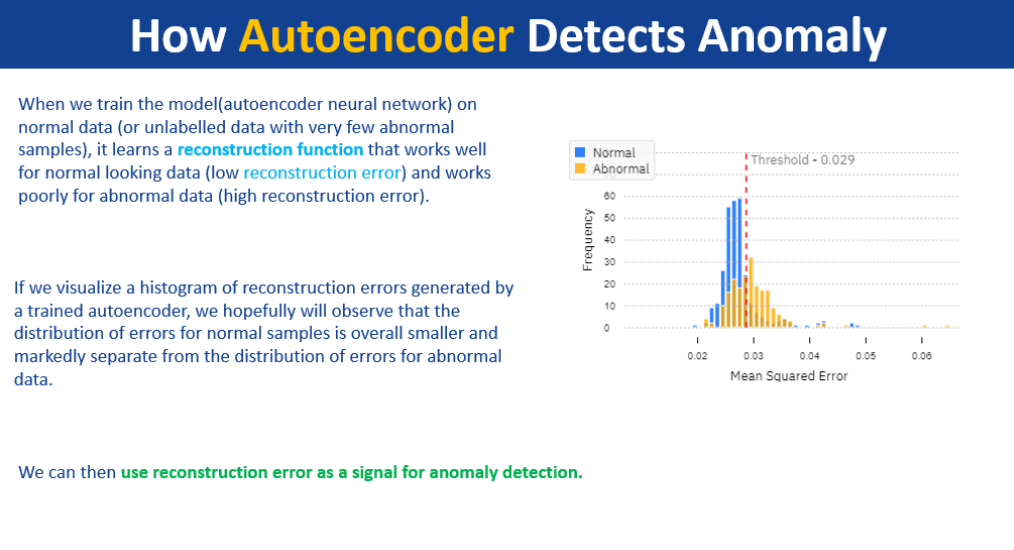

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/SampleData/AnomalyDetection/anomaly.csv')

In [ ]:
print(df.columns)
print(df.head())


Index(['Date', 'Power', 'Detector', 'Quality'], dtype='object')
       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good


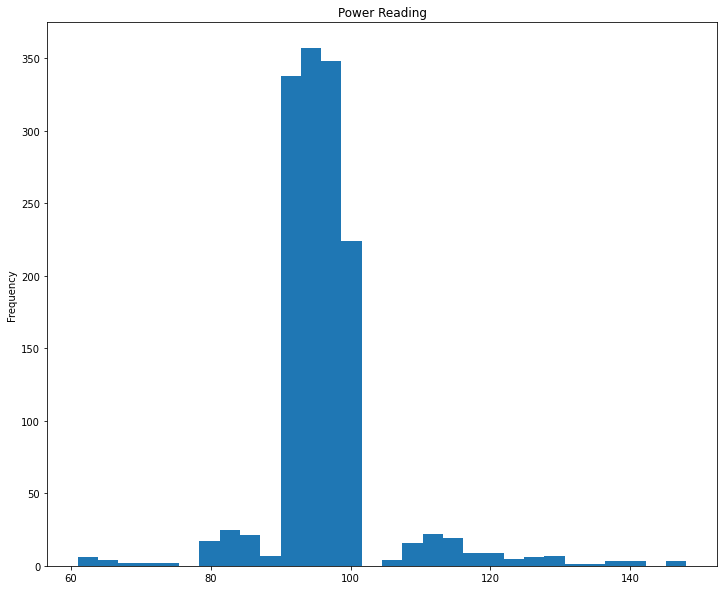

In [ ]:
df['Power'].plot(kind='hist', title='Power Reading', bins=30, figsize=(12,10))
#Most values between 90 and 100 with some outliers / anomalies

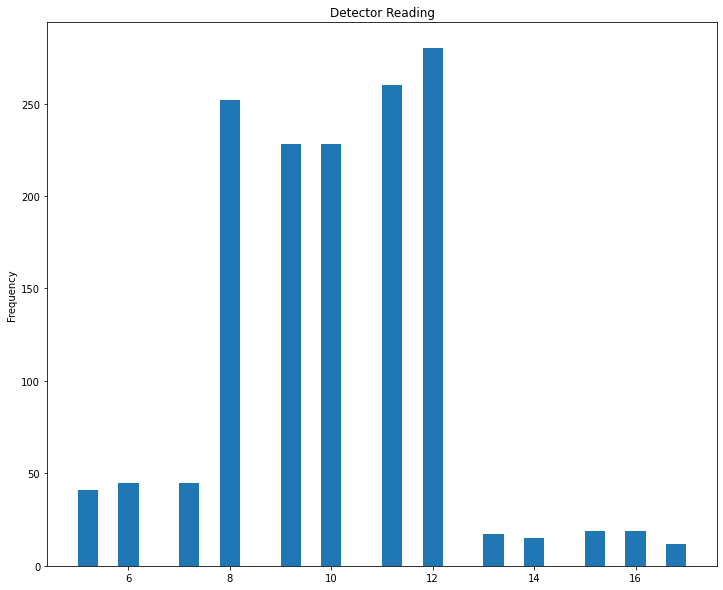

In [ ]:
df['Detector'].plot(kind='hist', title='Detector Reading', bins=30, figsize=(12,10))
#Most values between 8 and 12 with some outliers / anomalies

In [ ]:
#To see how the data is spread betwen Good and Bad
print(df.groupby('Quality')['Quality'].count())

Quality
Bad      407
Good    1054
Name: Quality, dtype: int64


In [ ]:
df.drop(['Date'], axis=1, inplace=True)
print(df.head())

   Power  Detector Quality
0     96         8    Good
1     96        10    Good
2     91         8    Good
3     97         9    Good
4     91        11    Good


In [ ]:
#If there are missing entries, drop them.
df.dropna(inplace=True,axis=1)

In [ ]:
#COnvert non-numeric to numeric
df.Quality[df.Quality == 'Good'] = 1
df.Quality[df.Quality == 'Bad'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
good_mask = df['Quality']== 1 #All good to be True for good data points
bad_mask = df['Quality']== 2 #All values False for good data points
print(good_mask.head())

0    True
1    True
2    True
3    True
4    True
Name: Quality, dtype: bool


In [ ]:
df.drop('Quality',axis=1,inplace=True)

In [ ]:
df_good = df[good_mask]
df_bad = df[bad_mask]

In [ ]:
print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

Good count: 1054
Bad count: 407


In [ ]:
# This is the feature vector that goes to the neural net
x_good = df_good.values
x_bad = df_bad.values

In [ ]:
from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

print(f"Good train count: {len(x_good_train)}")
print(f"Good test count: {len(x_good_test)}")

Good train count: 790
Good test count: 264


In [ ]:
#########
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(x_good.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_good_train,x_good_train,verbose=1,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 4051.5654
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 3510.1248
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 2837.3657
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 2046.7737
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 1229.8407
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 551.0989
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 155.2948
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 23.7272
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9057
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 2.7918
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 2.7252
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 2.7152
Epoch 13/100
25/2

In [ ]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

In [ ]:
pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

In [ ]:
pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))

In [ ]:
print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Out of Sample Good Score (RMSE): {score2}")
print(f"Bad sample Score (RMSE): {score3}")

Insample Good Score (RMSE): 1.4460604227372331
Out of Sample Good Score (RMSE): 1.442593303145012
Bad sample Score (RMSE): 3.6546826873984615


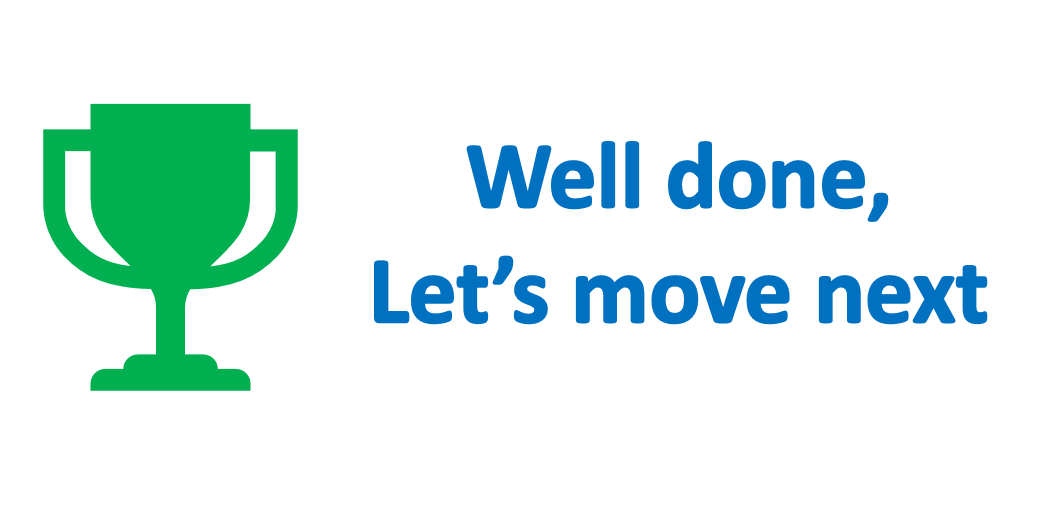